# Homework 2: More Exploratory Data Analysis
## Gene Expression Data and Election Polls 

Due: Thursday, October 2, 2014 11:59 PM

-----

## Introduction

John Tukey wrote in [Exploratory Data Analysis, 1977](http://www.amazon.com/Exploratory-Data-Analysis-Wilder-Tukey/dp/0201076160/ref=pd_bbs_sr_2/103-4466654-5303007?ie=UTF8&s=books&qid=1189739816&sr=8-2): "The greatest value of a picture is when it forces us to notice what we never expected to see." In this assignment we will continue using our exploratory data analysis tools, but apply it to new sets of data: [gene expression](http://en.wikipedia.org/wiki/Gene_expression) and polls from the [2012 Presidental Election](http://en.wikipedia.org/wiki/United_States_presidential_election,_2012) and from the [2014 Senate Midterm Elections](http://en.wikipedia.org/wiki/United_States_Senate_elections,_2014).   

**First**: You will use exploratory data analysis and apply the [singular value decomposition](http://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD) to a gene expression data matrix to determine if the the date that the gene expression samples are processed has large effect on the variability seen in the data.  

**Second**: You will use the polls from the 2012 Presidential Elections to determine (1) Is there a pollster bias in presidential election polls? and (2) Is the average of polls better than just one poll?

**Finally**: You will use the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to extract the polls for the current 2014 Senate Midterm Elections and provide a preliminary prediction of the result of each state.

#### Data

We will use the following data sets: 

1. A gene expression data set called `exprs_GSE5859.csv` and sample annotation table called `sampleinfo_GSE5859.csv` which are both available on Github in the 2014_data repository: [expression data set](https://github.com/cs109/2014_data/blob/master/exprs_GSE5859.csv) and [sample annotation table](https://github.com/cs109/2014_data/blob/master/sampleinfo_GSE5859.csv).  

2. Polls from the [2012 Presidential Election: Barack Obama vs Mitt Romney](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama). The polls we will use are from the [Huffington Post Pollster](http://elections.huffingtonpost.com/pollster).  

3. Polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api). 

---

## Load Python modules

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations

## Problem 1

In this problem we will be using a [gene expression](http://en.wikipedia.org/wiki/Gene_expression) data set obtained from a [microarray](http://en.wikipedia.org/wiki/DNA_microarray) experiment. [Read more about the specific experiment here](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE5859).  There are two data sets we will use:  

1. The gene expression intensities where the rows represent the features on the microarray (e.g. genes) and the columsns represent the different microarray samples.  

2. A table that contains the information about each of the samples (columns in the gene expression data set) such as the sex, the age, the treatment status, the date the samples were processed.  Each row represents one sample. 

#### Problem 1(a) 
Read in the two files from Github: [exprs_GSE5859.csv](https://github.com/cs109/2014_data/blob/master/exprs_GSE5859.csv) and [sampleinfo_GSE5859.csv](https://github.com/cs109/2014_data/blob/master/sampleinfo_GSE5859.csv) as pandas DataFrames called `exprs` and `sampleinfo`. Use the gene names as the index of the `exprs` DataFrame.

In [2]:
#your code here
exprs = pd.read_csv("https://github.com/cs109/2014_data/blob/master/exprs_GSE5859.csv?raw=true", index_col="Unnamed: 0")
sampleinfo = pd.read_csv("https://github.com/cs109/2014_data/raw/master/sampleinfo_GSE5859.csv")

In [3]:
exprs.head()

,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
1007_s_at,6.333951,5.736190,6.156754,6.513010,6.061013,6.506493,6.863426,6.369645,6.646321,5.810930,...,7.082636,6.315866,7.010165,6.460107,6.122355,6.330314,6.627014,6.133068,6.419444,6.488579
1053_at,7.255622,7.399993,7.491967,7.006123,7.250995,7.082581,6.842236,7.048487,7.042361,6.666625,...,6.599718,7.412731,7.274429,6.928642,7.168782,7.235648,6.939184,7.280781,6.351776,7.517410
117_at,5.760106,4.825169,5.039387,5.414160,5.205697,5.300078,5.099337,5.156459,5.736109,5.807496,...,6.231457,5.240717,5.275062,5.759827,5.409720,5.491938,5.113570,5.401876,5.537605,5.247190
121_at,6.935451,7.025210,7.543667,7.959781,7.223323,8.006816,8.102504,7.434617,7.532321,7.711461,...,8.215096,7.677593,7.923624,7.219401,7.432338,6.785174,7.833862,7.607461,7.302935,7.331864
1255_g_at,3.597872,3.108801,3.128269,3.364947,3.125909,3.186834,3.311022,3.092042,3.167737,2.969579,...,3.331424,3.043856,3.151900,3.132253,3.250600,2.984125,3.152269,3.225123,3.222731,3.175846


In [4]:
sampleinfo.head()

,ethnicity,date,filename,sex
0,CEU,2003-02-04,GSM25349.CEL.gz,M
1,CEU,2003-02-04,GSM25350.CEL.gz,M
2,CEU,2002-12-17,GSM25356.CEL.gz,M
3,CEU,2003-01-30,GSM25357.CEL.gz,M
4,CEU,2003-01-03,GSM25358.CEL.gz,M


Make sure the order of the columns in the gene expression DataFrame match the order of file names in the sample annotation DataFrame. If the order of the columns the `exprs` DataFrame do not match the order of the file names in the `sampleinfo` DataFrame, reorder the columns in the `exprs` DataFrame. 

**Note**: The column names of the gene expression DataFrame are the filenames of the orignal files from which these data were obtained.  

**Hint**: The method `list.index(x)` [[read here](https://docs.python.org/2/tutorial/datastructures.html)] can be used to return the index in the list of the first item whose value is x. It is an error if there is no such item. To check if the order of the columns in `exprs` matches the order of the rows in `sampleinfo`, you can check using the method `.all()` on a Boolean or list of Booleans: 

Example code: `(exprs.columns == sampleinfo.filename).all()`

In [5]:
#your code here
(exprs.columns == sampleinfo.filename).all() 

False

In [6]:
# Attempt to reorder columns

exprs = exprs[sampleinfo.filename]
(exprs.columns == sampleinfo.filename).all()

True

Show the head of the two tables: `exprs` and `sampleinfo`. 

In [7]:
#your code here
exprs.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM136719.CEL.gz,GSM136720.CEL.gz,GSM136721.CEL.gz,GSM136722.CEL.gz,GSM136723.CEL.gz,GSM136724.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz,GSM136729.CEL.gz
1007_s_at,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.466445,6.533592,6.631492,6.513362,6.440706,6.704324,6.488579,6.809481,6.133068,6.155473
1053_at,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.032885,7.156344,7.018025,6.973322,6.884738,7.120898,7.517410,7.200596,7.280781,7.111583
117_at,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.661112,5.127260,5.151840,5.505602,5.687689,4.942651,5.247190,5.237239,5.401876,5.302628
121_at,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.769734,7.815864,7.683279,7.883231,7.913621,7.834196,7.331864,7.357102,7.607461,7.456453
1255_g_at,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.257484,3.339234,3.298384,3.150654,3.344501,3.230285,3.175846,3.105092,3.225123,3.090149


In [8]:
sampleinfo.head()

,ethnicity,date,filename,sex
0,CEU,2003-02-04,GSM25349.CEL.gz,M
1,CEU,2003-02-04,GSM25350.CEL.gz,M
2,CEU,2002-12-17,GSM25356.CEL.gz,M
3,CEU,2003-01-30,GSM25357.CEL.gz,M
4,CEU,2003-01-03,GSM25358.CEL.gz,M


#### Problem 1(b)

Extract the year and month as integers from the `sampleinfo` table. 

**Hint**: To convert a Series or a column of a pandas DataFrame that contains a date-like object, you can use the `to_datetime` function [[read here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)].  This will create a `DatetimeIndex` which can be used to extract the month and year for each row in the DataFrame. 

In [9]:
#your code here
sampleinfo.date = pd.to_datetime(sampleinfo.date)
sampleinfo.dtypes

ethnicity            object
date         datetime64[ns]
filename             object
sex                  object
dtype: object

In [10]:
# Note: can't expect an element by element list for something like:
sampleinfo.date.month

AttributeError: 'Series' object has no attribute 'month'

In [11]:
# Instead, indiviudal mapping function needed
sampleinfo["month"] = map(lambda f: f.month, sampleinfo.date)
sampleinfo["year"] = map(lambda f: f.year, sampleinfo.date)
sampleinfo.head()

,ethnicity,date,filename,sex,month,year
0,CEU,2003-02-04,GSM25349.CEL.gz,M,2,2003
1,CEU,2003-02-04,GSM25350.CEL.gz,M,2,2003
2,CEU,2002-12-17,GSM25356.CEL.gz,M,12,2002
3,CEU,2003-01-30,GSM25357.CEL.gz,M,1,2003
4,CEU,2003-01-03,GSM25358.CEL.gz,M,1,2003


#### Problem 1(c)

Convert the dates in the `date` column from the `sampleinfo` table into days since October 31, 2002. Add a column to the `sampleinfo` DataFrame titled `elapsedInDays` containing the days since October 31, 2002.  Show the head of the `sampleinfo` DataFrame which includes the new column.  

**Hint**: Use the `datetime` module to create a new `datetime` object for the specific date October 31, 2002. Then, subtract the October 31, 2002 date from each date from the `date` column in the `sampleinfo` DataFrame. 

In [12]:
#your code here
my_date = pd.to_datetime("2002-10-31")
sampleinfo["elapsedInDays"] = sampleinfo.date - my_date
sampleinfo.head()

,ethnicity,date,filename,sex,month,year,elapsedInDays
0,CEU,2003-02-04,GSM25349.CEL.gz,M,2,2003,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,2,2003,96 days
2,CEU,2002-12-17,GSM25356.CEL.gz,M,12,2002,47 days
3,CEU,2003-01-30,GSM25357.CEL.gz,M,1,2003,91 days
4,CEU,2003-01-03,GSM25358.CEL.gz,M,1,2003,64 days


#### Problem 1(d)

Use exploratory analysis and the singular value decomposition (SVD) of the gene expression data matrix to determine if the date the samples were processed has large effect on the variability seen in the data or if it is just ethnicity (which is confounded with date). 

**Hint**: See the end of the [lecture from 9/23/2014 for help with SVD](http://nbviewer.ipython.org/github/cs109/2014/blob/master/lectures/lecture07/data_scraping_transcript.ipynb). 

First subset the the `sampleinfo` DataFrame to include only the CEU ethnicity.  Call this new subsetted DataFrame `sampleinfoCEU`.  Show the head of `sampleinfoCEU` DataFrame. 

In [13]:
#your code here
sampleinfoCEU = sampleinfo[sampleinfo["ethnicity"] == "CEU"]
sampleinfoCEU.head()

,ethnicity,date,filename,sex,month,year,elapsedInDays
0,CEU,2003-02-04,GSM25349.CEL.gz,M,2,2003,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,2,2003,96 days
2,CEU,2002-12-17,GSM25356.CEL.gz,M,12,2002,47 days
3,CEU,2003-01-30,GSM25357.CEL.gz,M,1,2003,91 days
4,CEU,2003-01-03,GSM25358.CEL.gz,M,1,2003,64 days


Next, subset the `exprs` DataFrame to only include the samples with the CEU ethnicity. Name this new subsetted DataFrame `exprsCEU`. Show the head of the `exprsCEU` DataFrame. 

In [14]:
#your code here
# Get the subset that matches filenames of filtered sample df
exprsCEU = exprs[sampleinfoCEU.filename]
exprsCEU.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
1007_s_at,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.501510,6.558100,6.618286,6.869995,5.981000,6.403285,6.248702,6.488579,6.809481,6.133068
1053_at,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.066686,7.386702,6.407958,7.089180,7.120923,7.018998,7.155419,7.517410,7.200596,7.280781
117_at,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.600514,5.232676,5.630720,4.944748,5.275577,5.770358,5.616842,5.247190,5.237239,5.401876
121_at,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.437535,7.714650,7.416252,7.746448,8.001434,7.626723,7.452299,7.331864,7.357102,7.607461
1255_g_at,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.009983,3.151203,3.199709,3.159496,3.149710,3.242780,3.433125,3.175846,3.105092,3.225123


Check to make sure the order of the columns in the `exprsCEU` DataFrame matches the rows in the `sampleinfoCEU` DataFrame.  

In [15]:
#your code here
(exprsCEU.columns == sampleinfoCEU.filename).all() 

True

Compute the average gene expression intensity in the `exprsCEU` DataFrame across all the samples. For each sample in the `exprsCEU` DataFrame, subtract the average gene expression intensity from each of the samples. Show the head of the mean normalized gene expression data.  

In [16]:
#your code here

# Compute the average gene expression intensity -> 1st mean by col -> Take 2nd mean across all cols
mean = exprsCEU.mean().mean()
# Subtract
res = (exprsCEU - mean)
res.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
1007_s_at,0.907868,0.530661,0.214982,0.426122,0.372124,0.322040,0.331229,0.344701,0.506960,0.639136,...,0.782364,0.838954,0.899140,1.150849,0.261854,0.684139,0.529556,0.769433,1.090335,0.413922
1053_at,1.220038,1.098892,1.328816,1.703331,1.553215,1.409071,1.031573,1.117141,1.018876,1.648749,...,1.347540,1.667556,0.688812,1.370034,1.401777,1.299852,1.436274,1.798264,1.481450,1.561635
117_at,-0.605576,-0.645050,-0.347945,-0.452596,-0.377099,-0.655269,-0.403247,-0.235494,0.970298,0.763636,...,-0.118632,-0.486470,-0.088426,-0.774398,-0.443569,0.051212,-0.102303,-0.471956,-0.481906,-0.317270
121_at,2.114716,2.061536,1.739051,1.936802,1.827410,1.353524,1.373838,1.235079,1.770639,1.669394,...,1.718389,1.995504,1.697106,2.027302,2.282288,1.907577,1.733153,1.612718,1.637956,1.888315
1255_g_at,-2.566876,-2.607399,-2.700214,-2.564601,-2.611192,-2.494861,-2.604905,-2.674171,-2.415108,-2.831227,...,-2.709163,-2.567943,-2.519437,-2.559650,-2.569436,-2.476366,-2.286020,-2.543300,-2.614054,-2.494023


In [17]:
# Turns out in answers, we want to normalize at the scale of each row i.e. subtract each row's mean from that rows data
data = exprsCEU.apply(lambda x: x - exprsCEU.mean(axis=1))
data.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
1007_s_at,0.365059,-0.012149,-0.327827,-0.116687,-0.170685,-0.220769,-0.211580,-0.198109,-0.035849,0.096327,...,0.239554,0.296144,0.356331,0.608040,-0.280956,0.141330,-0.013254,0.226624,0.547526,-0.128887
1053_at,-0.136032,-0.257178,-0.027254,0.347260,0.197144,0.053000,-0.324497,-0.238930,-0.337195,0.292678,...,-0.008531,0.311485,-0.667259,0.013964,0.045706,-0.056219,0.080203,0.442193,0.125379,0.205564
117_at,-0.490556,-0.530031,-0.232926,-0.337577,-0.262080,-0.540250,-0.288228,-0.120475,1.085317,0.878655,...,-0.003613,-0.371451,0.026594,-0.659379,-0.328549,0.166231,0.012716,-0.356936,-0.366887,-0.202251
121_at,0.418026,0.364847,0.042362,0.240113,0.130720,-0.343165,-0.322852,-0.461611,0.073949,-0.027296,...,0.021700,0.298814,0.000417,0.330612,0.585598,0.210887,0.036463,-0.083972,-0.058733,0.191626
1255_g_at,0.018335,-0.022187,-0.115002,0.020611,-0.025980,0.090351,-0.019693,-0.088959,0.170104,-0.246015,...,-0.123951,0.017269,0.065775,0.025562,0.015776,0.108846,0.299192,0.041912,-0.028842,0.091189


**NOTE:** "axis=0 is the dimension that points downwards and axis=1 the one that points to the right"

Using this mean normalized gene expression data, compute the projection to the first Principal Component (PC1).  

**Hint**: Use the `numpy.linalg.svd()` function in the `numpy.linalg` module (or the `scipy.linalg.svd()` function in the `scipy.linalg` module) to apply an [singular value decomposition](http://en.wikipedia.org/wiki/Singular_value_decomposition) to a matrix.  

In [18]:
#your code here

# Follow docs convention
U, s, V = np.linalg.svd(data.values) # SVD works on matrices i.e. 2D array not DataFrame

In [19]:
data.values.shape, U.shape, s.shape, V.shape

((8793, 102), (8793, 8793), (102,), (102, 102))

https://en.wikipedia.org/wiki/Principal_component_analysis

In [20]:
# What is PC1? -> principal component analysis along 1st component -> greatest variance
# There are upto 102 vectors in PCA, we're picking out the 1st one
# Also, turns out in solutions we need to transpose the response V to use it...
PC1 = V.T[:,0]

Create a histogram using the values from PC1.  Use a bin size of 25.  

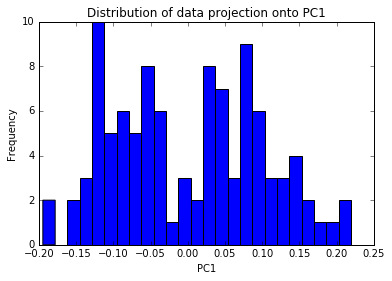

In [21]:
#your code here

# PC1 refers to V vector
plt.hist(PC1, bins=25)
plt.xlabel('PC1')
plt.ylabel('Frequency')
plt.title('Distribution of data projection onto PC1')

Create a scatter plot with the days since October 31, 2002 on the x-axis and PC1 on the y-axis.

TypeError: Cannot cast scalar from dtype('float64') to dtype('<m8[ns]') according to the rule 'same_kind'

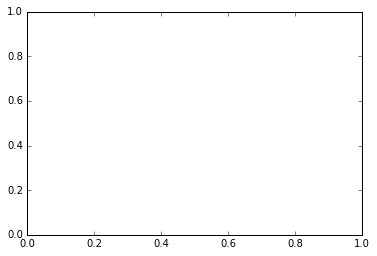

In [22]:
#your code here
plt.scatter(sampleinfoCEU.elapsedInDays, PC1)
plt.xlabel('Days since Oct 31 2002)')
plt.ylabel('PC1')
plt.title('PC1 vs. Date of Process Sampling')

In [23]:
sampleinfoCEU.head()

,ethnicity,date,filename,sex,month,year,elapsedInDays
0,CEU,2003-02-04,GSM25349.CEL.gz,M,2,2003,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,2,2003,96 days
2,CEU,2002-12-17,GSM25356.CEL.gz,M,12,2002,47 days
3,CEU,2003-01-30,GSM25357.CEL.gz,M,1,2003,91 days
4,CEU,2003-01-03,GSM25358.CEL.gz,M,1,2003,64 days


In [24]:
# Note the " days" part, we need to keep just the numerical day count
# Note that .days can't be done on entire array -> so map
sampleinfoCEU.elapsedInDays = map(lambda f: f.days, sampleinfoCEU.elapsedInDays)

/Users/Sachin/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


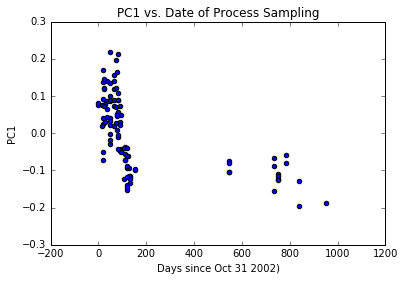

In [25]:
#your code here
plt.scatter(sampleinfoCEU.elapsedInDays, PC1)
plt.xlabel('Days since Oct 31 2002)')
plt.ylabel('PC1')
plt.title('PC1 vs. Date of Process Sampling')

Around what day do you notice a difference in the way the samples were processed?

(0, 200)

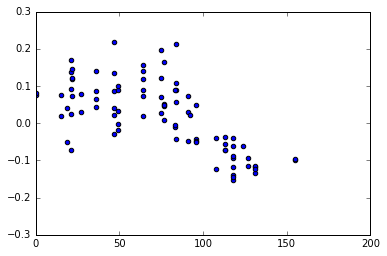

In [28]:
#your code here
# Let's zoom into the first cluster
plt.scatter(sampleinfoCEU.elapsedInDays, PC1)
plt.xlim(0,200)

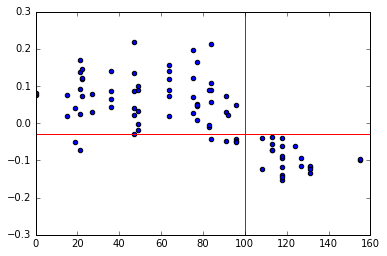

In [40]:
plt.scatter(sampleinfoCEU.elapsedInDays, PC1)
plt.xlim(0,160)
plt.ylim(-0.3, 0.3)
plt.axvline(x=100, color='r')
plt.axhline(y=-0.03, color='r')

Answer: Around day 100

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*
- Gene dataset of multiple features (i.e. high dimensionality) was decomposed using SVD and projected onto PC1 hyperplane
- This revealed a pattern that diverged about 100 days since the first sample was taken
- We see the date the samples were processed does have a large effect on the variability seen in the data
---


## Problem 2: Is there a pollster bias in presidential election polls?

#### Problem 2(a)

The [HuffPost Pollster](http://elections.huffingtonpost.com/pollster) contains many political polls. You can access these polls from individual races as a CSV but you can also access polls through the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to access the data.  

Read in the polls from the [2012 Presidential Election: Barack Obama vs Mitt Romney](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama) into a pandas DataFrame called `election`. For this problem, you may read in the polls for this race directly using [the CSV file](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv) available from the HuffPost Pollster page.

In [17]:
#your code here
election = pd.read_csv("http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv", date_parser=True)

Show the head of the `election` DataFrame. 

In [18]:
#your code here
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


How many polls were conducted in November? Define this number as M.  

**Hint**: Subset the `election` DataFrame for only dates in the `Start Date` column that are in November 2012.  

In [50]:
#your code here
start = pd.to_datetime("2012-11-01")
end = pd.to_datetime("2012-11-30")
election["Start Date"] = pd.to_datetime(election["Start Date"])

# Gotta use map for date time manipulations and queries
subset = election[map(lambda f: f.month == 11 and f.year == 2012, election["Start Date"])]

# There is a dupe
subset.drop_duplicates('Pollster', inplace = True) # Removes duplicate pollsters
M = len(subset)
print "Count: ", M

Count:  18


/Users/Sachin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


What was the median of the number of observations in the November polls? Define this quantity as N. 

In [49]:
#your code here
subset["Number of Observations"].median # Wrong, we want to operate on entire series
N =  np.median(subset["Number of Observations"])
print "Median: ", N

Median:  1200.0


#### Problem 2(b)

Using the median sample size $N$ from Problem 1(a), simulate the results from a single poll:  simulate the number of votes for Obama out of a sample size $N$ where $p$ = 0.53 is the percent of voters who are voting for Obama.  

**Hint**: Use the binomial distribution with parameters $N$ and $p$ = 0.53. 

In [66]:
p = 0.53

In [67]:
#your code here
np.random.binomial(N, p)

613

Now, perform a Monte Carlo simulation to obtain the estimated percentage of Obama votes with a sample size $N$ where $N$ is the median sample size calculated in Problem 2(a). Let $p$=0.53 be the percent of voters are voting for Obama. 

**Hint**: You will repeat the simulation above 1,000 times and plot the distribution of the estimated *percent* of Obama votes from a single poll.  The results from the single poll you simulate is random variable and will be different every time you sample. 

In [68]:
B = 1000

In [89]:
#your code here
res = []
for i in range(B):
    res.append(np.random.binomial(N, p)/N)

In [90]:
# Alternatively, consider a bernoulli size 1000
res = np.random.binomial(N, p, size = B) / N

Plot the distribution of the estimated percentage of Obama votes from your single poll. What is the distribution of the estimated percentage of Obama votes? 

(array([   8.,   35.,   96.,  174.,  210.,  211.,  145.,   82.,   30.,    9.]),
 array([ 0.48916667,  0.49741667,  0.50566667,  0.51391667,  0.52216667,
         0.53041667,  0.53866667,  0.54691667,  0.55516667,  0.56341667,
         0.57166667]),
 <a list of 10 Patch objects>)

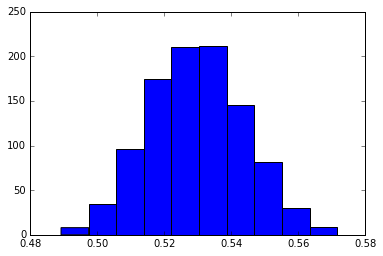

In [91]:
#your code here
plt.hist(res)

Answer: Looks normal, how do we verify?

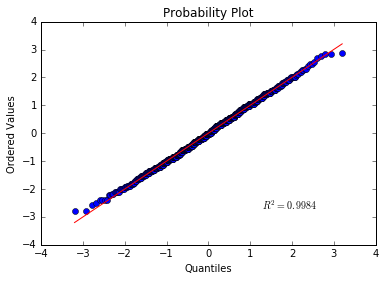

In [95]:
# We can use a qqplot to visually inspect if this distribution is normally distributed.
import scipy.stats as stats
stats.probplot((res - np.mean(res)) / np.std(res, ddof=1), dist="norm", plot = plt)
# ddof: Means Delta Degrees of Freedom
plt.show()

What is the standard error (SE) of the estimated percentage from the poll. 

**Hint**: Remember the SE is the standard deviation (SD) of the distribution of a random variable. 

In [97]:
#your code here
np.std(res)

0.014496568942722658

From the lecture we saw if we observe $N$ Bernoulli random variables $(X_1, \ldots X_N)$, then 
$$ \mbox{E}(\bar{X}) = \frac{1}{N} \sum_{i=1}^N p = p$$
$$\mbox{Var}(\bar{X})= \frac{1}{N^2} \sum_{i=1}^N p(1-p) = \frac{p(1-p)}{N}$$

In our example, we assume each $X_i$ is a Bernoulli distribution with $p$ = 0.53. Therefore, if $N$ = 1200, we can analytically calculate the standard deviation of $\bar{X}$ directly and compare to the standard error above

In [98]:
np.sqrt(p*(1-p)/N)

0.014407752542757436

#### Problem 2(c)

Now suppose we run M polls where M is the number of polls that happened in November (calculated in Problem 2(a)). Run 1,000 simulations and compute the mean of the M polls for each simulation. 

In [110]:
print "M = Number of polls to simulate =", M
print "N = Sample size of each poll =", N
print "p = Probability of voting for Obama =", p

M = Number of polls to simulate = 18
N = Sample size of each poll = 1200.0
p = Probability of voting for Obama = 0.53


In [113]:
# Run M polls
def run_poll(N, p, M): return np.random.binomial(N, p, size=M)/N

In [114]:
# Simulate 1000 times, taking averages for each iter
result = map(lambda f: np.mean(run_poll(N, p, M)), xrange(1000))

What is the distribution of the average of polls?

**Hint**: Show a plot. 

(array([   8.,   27.,  133.,  220.,  269.,  229.,   89.,   23.,    1.,    1.]),
 array([ 0.51935185,  0.52180093,  0.52425   ,  0.52669907,  0.52914815,
         0.53159722,  0.5340463 ,  0.53649537,  0.53894444,  0.54139352,
         0.54384259]),
 <a list of 10 Patch objects>)

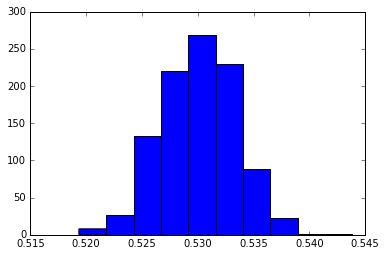

In [115]:
plt.hist(result)

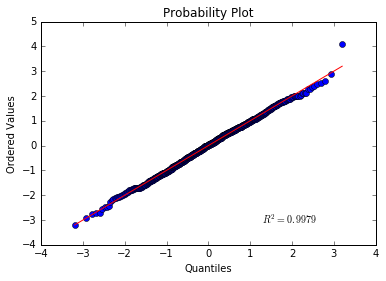

In [119]:
stats.probplot((result - np.mean(result)) / np.std(result, ddof=1), dist="norm", plot = plt)
plt.show()

What is the standard error (SE) of the average of polls? 

In [116]:
#your code here
np.std(result)

0.0033617801739448442

Is the SE of the average of polls larger, the same, or smaller than that the SD of a single poll (calculated in Problem 2(b))? By how much?

**Hint**: Compute a ratio of the two quantities.  

In [125]:
#your code here
print "Average poll error is", 1/(np.std(result)/np.std(res)), "times smaller"

Average poll error is 4.31217039564 times smaller


#### Problem 2(d) 

Repeat Problem 2(c) but now record the *across poll* standard deviation in each simulation. 

In [126]:
#your code here
# Simulate 1000 times, taking std for each iter
std_res = map(lambda f: np.std(run_poll(N, p, M)), xrange(1000))

What is the distribution of the *across M polls* standard deviation?

**Hint**: Show a plot. 

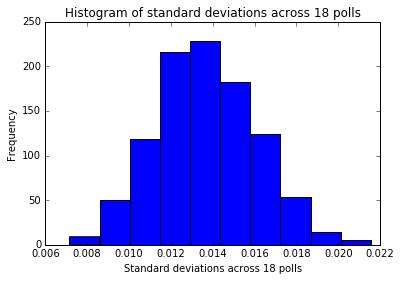

In [129]:
#your code here
plt.hist(std_res)
plt.xlabel('Standard deviations across %i polls' % M)
plt.ylabel('Frequency')
plt.title('Histogram of standard deviations across %i polls' % M)

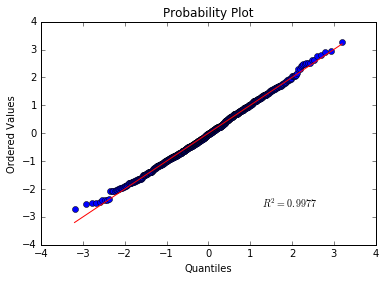

In [130]:
stats.probplot((std_res - np.mean(std_res)) / np.std(std_res, ddof=1), dist="norm", plot = plt)
plt.show()

#### Problem 2(e) 

What is the standard deviation of M polls in our real (not simulated) 2012 presidential election data ? 

In [131]:
#your code here
subset.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [133]:
se_real = np.std(subset["Obama"]/100)
se_real

0.010829771494232194

Is this larger, the same, or smaller than what we expeced if polls were not biased.

In [139]:
#your code here
print "Real standard deviation is", np.mean(std_res)/se_real, "times smaller than unbiased simulations"

Real standard deviation is 1.26495590027 times smaller than unbiased simulations


Another way of comparing the standard deviation of the M polls in the 2012 presidential eletion data is to compare it directly to the distribuiton of `sds`. We can calculate a *p*-value or the probability of seeing values as large as `thesd` or larger. 

In [154]:
count = 0
for i in std_res:
    if (se_real > i):
        count = count + 1
count*1.0/len(std_res)

0.11

#### Problem 2(f)

**For AC209 Students**: Learn about the normal approximation for the binomial distribution and derive the results of Problem 2(b) and 2(c) analytically (using this approximation). Compare the results obtained analytically to those obtained from simulations.

**Solution:** A random variable $X$ that has a [Binomial distribution](http://en.wikipedia.org/wiki/Binomial_distribution) with $N$ independent trials of a binary outcome (e.g. yes/no) each with probability of success $p$ can be [approximated by a normal distribution](http://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation) if $n$ is large enough. Another way of writing this is if $X$ has a Binomial distribution with parameters $N$ and $p$, $X \sim Bin(N,p)$, and $N$ is "large enough", then $X$ can be approximated by a normal distribution with mean $Np$ and variance $Np(1-p)$, or $X \sim Normal(Np, Np(1-p))$. 

In Problem 2(b), we are asking about the *percentage* of Obama votes, therefore we are actually interested in $Y_i = \frac{X_i}{N}$ where $X_i \sim Bin(N, p)$. In this case, $\mbox{Var}(Y_i)  = p(1-p)$. To estimate the standard deviation of $\bar{Y}$, 

$$\mbox{Var}(\bar{Y}) =  \frac{1}{N^2} \sum_{i=1}^N p(1-p) = \frac{p(1-p)}{N}$$

Thus, we can analytically compute the standard deviation of $\bar{Y}$ using $\sqrt{\frac{p(1-p)}{N}}$ and compare to the standard deviation obtained from simulations. 

In [155]:
# Standard deviation from simulations in 2(b) 
print "SD from simulations: %g" % np.std(res, ddof=1)

# Standard deviation computed analytically
print "SD using normal approximation %g" % np.sqrt(p * (1-p)/ N)

SD from simulations: 0.0145038
SD using normal approximation 0.0144078


In Problem 2(c), we are asking about the *percentage* of Obama votes from averaged across M polls.  Above we saw the variance for each poll is $\frac{p(1-p)}{N}$. Therefore we can treat the variance at the poll level as $\sigma_{poll}^2 = \frac{p(1-p)}{N}$. Then, when we average across M polls the variance becomes $\sigma_{poll}^2 / M = \frac{p(1-p)}{N \cdot M }$

In [156]:
# Standard deviation from simulations in 2(c) 
print "SD from simulations: %g" % np.std(result, ddof=1)

# Standard deviation computed analytically
print "SD using normal approximation %g" % np.sqrt((p * (1-p)/ N) / M)

SD from simulations: 0.00336346
SD using normal approximation 0.00339594


## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*
- Standard error for real polls was less than that of a simulation modelled by normal distribution
- So, polls can be considered to be unbiased
---


## Problem 3: Is the average of polls better than just one poll?

#### Problem 3(a)

Most undecided voters vote for one of the two candidates at the election. Therefore, the reported percentages underestimate the final value of both candidates. However, if we assume the undecided will split evenly, then the observed difference should be an unbiased estimate of the final difference. 

Add a new column to the `election` DataFrame containg the difference between Obama and Romeny called `Diff`. 

In [210]:
#your code here
election["Diff"] = election["Obama"] - election["Romney"]
subset["Diff"] = subset["Obama"] - subset["Romney"]

/Users/Sachin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [211]:
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-1.0


#### Problem 3(b)

Make a plot of the differences for the week before the election (e.g. 5 days) where the days are on the x-axis and the differences are on the y-axis.  Add a horizontal line showing 3.9%: the difference between Obama and Romney on election day.

In [212]:
election_date = max(election["Start Date"])
sub = election[map(lambda f: f.days <= 5, election_date - election["Start Date"])]
sub["Days"] = map(lambda f: f.days, election_date - sub["Start Date"])

/Users/Sachin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


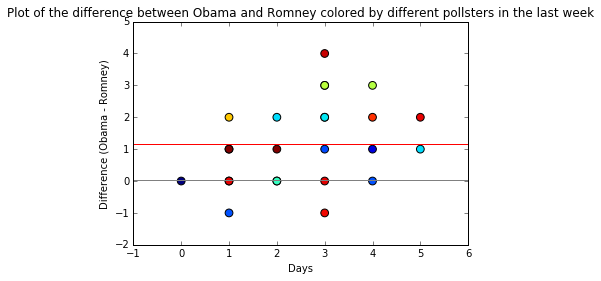

In [213]:
#your code here
color_map = {}
for i, p in enumerate(set(sub.Pollster)):
    color_map[p] = np.random.rand();

plt.scatter(sub.Days, sub.Diff, c = map(lambda x: color_map[x], sub.Pollster),  s=60 )
plt.axhline(y=0.039, c = "gray")
plt.axhline(y=np.mean(sub.Diff), c = "red")
plt.xlabel("Days")
plt.ylabel("Difference (Obama - Romney)")
plt.title("Plot of the difference between Obama and Romney colored by different pollsters in the last week")

#### Problem 3(c) 

Make a plot showing the differences by pollster where the pollsters are on the x-axis and the differences on the y-axis. 

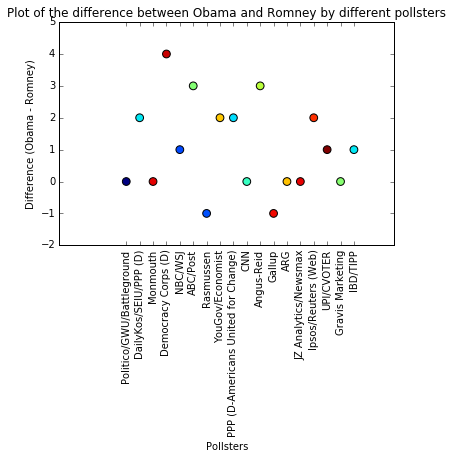

In [214]:
# Solution
pollster_map = {}

polls = list(set(subset.Pollster)) # Get rid of dupes

# We plot ints corresponding to indices
for i, p in enumerate(polls):
    pollster_map[p] = i

plt.scatter(map(lambda x: pollster_map[x],subset.Pollster), subset.Diff, \
            c = map(lambda x: color_map[x],subset.Pollster),s=60)

# Ticks correspond to string
plt.xticks(range(len(polls)), polls, rotation = 90)
plt.xlabel("Pollsters")
plt.ylabel("Difference (Obama - Romney)")
plt.title("Plot of the difference between Obama and Romney by different pollsters")
plt.show()

Is the *across poll* difference larger than the *between pollster* difference? 

Answer: The first graph (within a pollster) shows less spread than second (between pollsters)

#### Problem 3(d)

Take the average for each pollster and then compute the average of that. Given this difference how confident would you have been of an Obama victory?

**Hint**: Compute an estimate of the SE of this average based exclusively on the observed data. 

In [215]:
#your code here
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-1.0


In [224]:
group = subset.groupby("Pollster").mean()
avg = np.mean(group.Diff)
se = np.std(group.Diff)
print "Average Diff:", avg
print "Standard Error:", se

Average Diff: 1.05555555556
Standard Error: 1.39332624489


Answer: Error larger than Average difference from Polls, so the model may not be conclusive -> statistically Obama could lose

#### Problem 3(e)

**For AC209 Students**: Show the difference against time and see if you can detect a trend towards the end. Use this trend to see if it improves the final estimate.

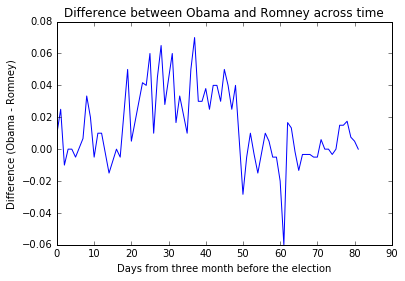

In [235]:
# Solution
three_months = dt.datetime(2012,8,15,0,0)

new_data = election [map(lambda x: x >= three_months , election["Start Date"]) ]
new_data = new_data.sort_values("Start Date")
new_data["days"]= map(lambda x: (x - three_months).days , new_data["Start Date"])

new_data["Diff"] = (new_data.Obama/100) - (new_data.Romney/100)
new_data = new_data.groupby(["days"], as_index=False).mean()

plt.figure()
plt.plot(new_data.days, new_data.Diff )
plt.xlabel("Days from three month before the election")
plt.ylabel("Difference (Obama - Romney)")
plt.title("Difference between Obama and Romney across time")
plt.show()

Answer: 50 days before election

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*
- Yes, the average of polls is better than just one poll because there can be a large amount of variability between pollsters.

-----

## Problem 4

In this last problem, we will use the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to create a preliminary prediction of the result of each state. 

The HuffPost Pollster API allows you to access the data as a CSV or a JSON response by tacking ".csv" or ".json" at the end of the URLs. For example the 2012 Presidential Election could be accessed as a [.json](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.json) instead of a [.csv](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv)

#### Problem 4(a)

Read in the polls for **all** of the 2014 Senate Elections using the HuffPost API. For example, we can consider the [2014 Senate race in Kentucky between Mitch McConnell and Alison Grimes](http://elections.huffingtonpost.com/pollster/2014-kentucky-senate-mcconnell-vs-grimes). 

To search for the 2014 Senate races, use the `topics` parameter in the API [[read more about topics here](http://elections.huffingtonpost.com/pollster/api)].  

In [236]:
url_str = "http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate"

To list all the URLs related to the 2014 Senate races using the pollster API, we can use a list comprehension:

In [237]:
election_urls = [election['url'] + '.csv' for election in requests.get(url_str).json()]
election_urls

[u'http://elections.huffingtonpost.com/pollster/2014-delaware-senate-wade-vs-coons.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-massachusetts-senate-herr-vs-markey.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-rhode-island-senate-zaccaria-vs-reed.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-montana-senate-daines-vs-curtis.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-oklahoma-senate-lankford-vs-johnson.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-hawaii-senate-cavasso-vs-schatz.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-kansas-senate-roberts-vs-orman-vs-taylor.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-wyoming-senate.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-tennessee-senate-alexander-vs-ball.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-idaho-senate-risch-vs-mitchell.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-new-jersey-senate-bell-vs-booker

Because there so many Senate races, we can create a dictionary of pandas DataFrames that will be keyed by the name of the election (a string). 

In [238]:
def build_frame(url):
    """
    Returns a pandas DataFrame object containing
    the data returned from the given url
    """
    source = requests.get(url).text
    
    # Use StringIO because pd.DataFrame.from_csv requires .read() method
    s = StringIO(source)
    
    return pd.DataFrame.from_csv(s, index_col=None).convert_objects(
            convert_dates="coerce", convert_numeric=True)

In [239]:
# Makes a dictionary of pandas DataFrames keyed on election string.
dfs = dict((election.split("/")[-1][:-4], build_frame(election)) for election in election_urls)

/Users/Sachin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Show the head of the DataFrame containing the polls for the 2014 Senate race in Kentucky between McConnell and Grimes.

In [244]:
#your code here
dfs["2014-kentucky-senate-mcconnell-vs-grimes"].head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Grimes,McConnell,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,PPP (D),2014-10-30,2014-11-01,2014-11-02 01:44:58,1503,Likely Voters,IVR/Online,42.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2014/PP...,Pollster,Dem,NaN,1
1,NBC/Marist,2014-10-27,2014-10-30,2014-11-02 14:37:22,556,Likely Voters,Live Phone,41.0,50.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://newscms.nbcnews.com/sites/newscms/files...,Nonpartisan,None,NaN,1
2,SurveyUSA/Courier-Journal/Herald-Leader/WHAS/WKYT,2014-10-25,2014-10-29,2014-10-30 23:33:59,597,Likely Voters,IVR/Online,43.0,48.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.surveyusa.com/client/PollReport.asp...,Nonpartisan,None,NaN,1
3,POS (R-Crossroads GPS),2014-10-25,2014-10-27,2014-10-30 20:56:18,600,Likely Voters,Live Phone,43.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://www.crossroadsgps.org/wp-content/uploa...,Sponsor,Rep,NaN,1
4,CBS/NYT/YouGov,2014-10-16,2014-10-23,2014-10-26 15:00:07,1502,Likely Voters,Internet,39.0,45.0,14.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2014/09/07/battl...,Nonpartisan,None,NaN,1


#### Problem 4(b)

For each 2014 Senate race, create a preliminary prediction of the result for that state.

In [253]:
#your code here
for key, df in enumerate(dfs):
    

IndentationError: expected an indented block (<ipython-input-253-5e669bef4595>, line 3)